# ANOVA

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [2]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

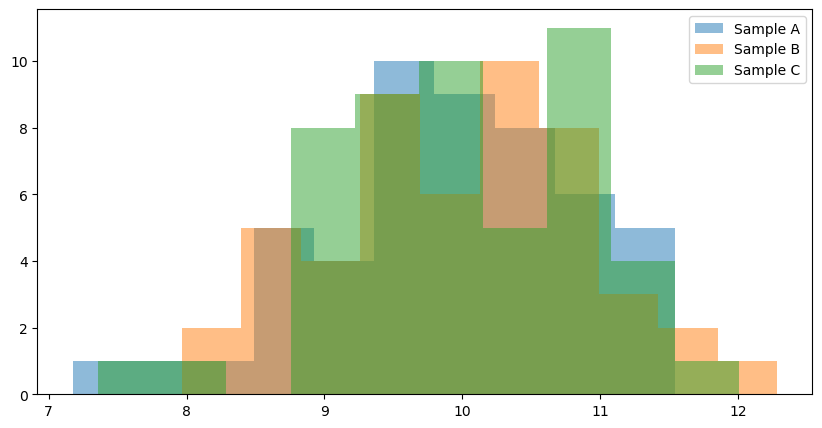

In [3]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [4]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-0.3610881666392647, 0.7188107861822104)

In [5]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(0.3610881666392647, 0.7188107861822104)

In [6]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(-0.46275001016991, 0.6445694530899261)

In [7]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(-0.09557186742322579, 0.9240557667047267)

## $n$ Samples

In [8]:
# Number of samples.
n = 4

In [9]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [10]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [11]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [12]:
# Suppose we had 6 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [13]:
def simulate_ttest(alpha=0.05):
    # Geneate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [14]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

486

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [15]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [16]:
# Create data frame.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,29.364106,23.783767,20.665922
1,22.840076,21.190837,21.949563
2,26.737058,25.925176,19.271362
3,28.233658,24.385432,24.852847
4,24.443971,19.847313,24.027018
5,26.115498,21.933125,22.713361
6,26.906789,20.741089,24.177880
7,22.848305,19.336059,28.505218
8,23.810141,24.524304,26.055279
9,31.278792,21.262965,26.002867


In [17]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,26.257839,22.293007,23.822132
std,2.828842,2.218875,2.755032
min,22.840076,19.336059,19.271362
25%,23.968598,20.853526,22.140512
50%,26.426278,21.598045,24.102449
75%,27.901941,24.235016,25.715362
max,31.278792,25.925176,28.505218


In [18]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(5.846862886414976, 0.0077671805184883315)

In [19]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.965     0.006     1.065     6.865
 (0 - 2)      2.436     0.112    -0.464     5.335
 (1 - 0)     -3.965     0.006    -6.865    -1.065
 (1 - 2)     -1.529     0.403    -4.429     1.371
 (2 - 0)     -2.436     0.112    -5.335     0.464
 (2 - 1)      1.529     0.403    -1.371     4.429



## Presenting the Data

In [20]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate arrays.
data = np.concatenate([beginner, intermediate, advanced])

# Show.
data

array([24.84627631, 25.1955189 , 26.63177747, 24.63314572, 24.05388844,
       28.09380648, 23.56777204, 24.84654641, 31.99014193, 28.7821183 ,
       22.68174593, 24.55983617, 26.45519201, 24.41812544, 21.39561774,
       27.14711571, 19.72197748, 24.01847114, 20.24136568, 22.78752801,
       22.14411984, 21.84080917, 26.01718006, 20.51661848, 19.0289048 ,
       18.76102894, 25.07406945, 19.84994588, 26.35748658, 23.91937921])

In [21]:
# Create the labels.
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

# Show.
labels

['Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced']

In [22]:
# Create data frame.
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,24.846276
1,Beginner,25.195519
2,Beginner,26.631777
3,Beginner,24.633146
4,Beginner,24.053888
5,Beginner,28.093806
6,Beginner,23.567772
7,Beginner,24.846546
8,Beginner,31.990142
9,Beginner,28.782118


In [23]:
# Pull the groups out.
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(5.871010668177697, 0.00763748008082926)

In [24]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.921     0.052    -0.023     5.865
 (0 - 2)      3.913     0.008     0.969     6.857
 (1 - 0)     -2.921     0.052    -5.865     0.023
 (1 - 2)      0.992     0.685    -1.952     3.936
 (2 - 0)     -3.913     0.008    -6.857    -0.969
 (2 - 1)     -0.992     0.685    -3.936     1.952



## End